In [169]:
from perlin_numpy import generate_perlin_noise_2d

In [170]:
noise = generate_perlin_noise_2d(shape=[64,32], res=[8,4], tileable=[True,True])
noise

array([[ 0.        , -0.12639952, -0.24608959, ...,  0.50654704,
         0.32937936,  0.14146796],
       [-0.14099719, -0.25930059, -0.35022263, ...,  0.38060915,
         0.19062231, -0.0016108 ],
       [-0.32051514, -0.41676382, -0.47112687, ...,  0.17618734,
        -0.01692027, -0.19870908],
       ...,
       [ 0.40735757,  0.26987072,  0.11380865, ...,  0.77393784,
         0.68901894,  0.54578401],
       [ 0.28600274,  0.15074405, -0.00817465, ...,  0.71074777,
         0.5864672 ,  0.4246261 ],
       [ 0.13475335,  0.00359476, -0.14062376, ...,  0.61113781,
         0.45307493,  0.27476077]])

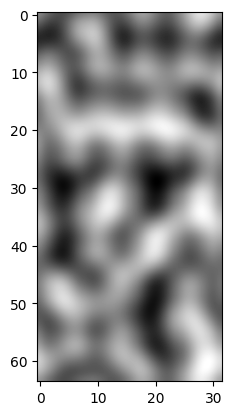

In [171]:
import matplotlib.pyplot as plt
plt.imshow(noise, cmap='gray', interpolation='lanczos')

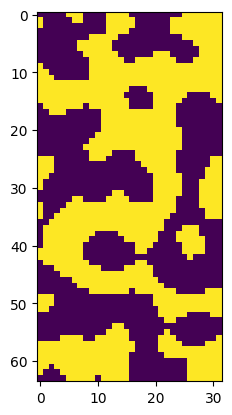

In [172]:
import numpy as np

def threshold(array, limit=0.5):
    select = array > limit
    array *= 0
    array[select] = 1.0
    return array

noise = generate_perlin_noise_2d(shape=[64,32], res=[8,4], tileable=[True,True])
noise = (noise + 1.0) / 2.0
plt.imshow(threshold(noise, .5))

In [173]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
a.repeat(2, axis=0).repeat(2, axis=1)

array([[1, 1, 2, 2, 3, 3],
       [1, 1, 2, 2, 3, 3],
       [4, 4, 5, 5, 6, 6],
       [4, 4, 5, 5, 6, 6]])

In [241]:
from numpy.lib.stride_tricks import sliding_window_view
a = np.array([[1,2,3],[4,5,6]])
print(a)
print(sliding_window_view(a, window_shape=(2,2)))
print(sliding_window_view(a, window_shape=(2,2))[0])

[[1 2 3]
 [4 5 6]]
[[[[1 2]
   [4 5]]

  [[2 3]
   [5 6]]]]
[[[1 2]
  [4 5]]

 [[2 3]
  [5 6]]]


In [184]:
def categorize(window):
    return window.flatten()

categorize(np.array([[1,2],[3,4]]))

array([1, 2, 3, 4])

In [242]:
def categorize(window):
    a = window.flatten()
    return a.dot(1 << np.arange(a.shape[-1] - 1, -1, -1))

print(categorize(np.array([[0,0],[0,1]])))
categorize(np.array([[1,1],[1,1]]))

1


15

(64, 32)
1953
0.0 0.0 0.0
1.0 0.0 0.0
1.0 0.0 0.0
(63, 31, 2, 2)
[[0. 0.]
 [1. 0.]]
[[0. 0.]
 [0. 0.]]
[[1. 0.]
 [1. 0.]]
(63, 31)


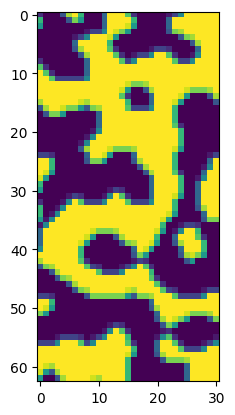

In [315]:
windows = sliding_window_view(noise, window_shape=(2,2))#[0]
print(noise.shape)
print((noise.shape[0]-1) * (noise.shape[1]-1))
print(noise[0][0], noise[0][1], noise[0][2])
print(noise[1][0], noise[1][1], noise[1][2])
print(noise[2][0], noise[2][1], noise[2][2])
print(windows.shape)
print(windows[0][0])
print(windows[0][1])
print(windows[1][0])
result = np.array(list(categorize(windows[row,col]) for row in range(windows.shape[0]) for col in range(windows.shape[1]))).reshape(windows.shape[:2])
print(result.shape)
plt.imshow(result)

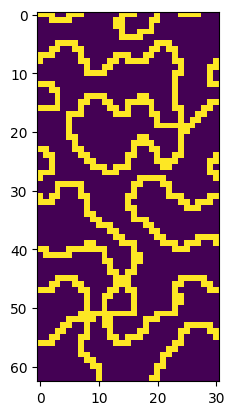

In [332]:
noise = generate_perlin_noise_2d(shape=[64,32], res=[8,4], tileable=[True,True])
noise = (noise + 1.0) / 2.0

def threshold(array, upper_limit=0.5, lower_limit=0.0):
    select = array < upper_limit 
    select_lower = array >= lower_limit
    array *= 0
    array[np.logical_and(select, select_lower)] = 1.0
    return array

def categorize(window):
    a = window.flatten()
    return a.dot(1 << np.arange(a.shape[-1] - 1, -1, -1))

windows = sliding_window_view(threshold(noise, .5), window_shape=(2,2))
result = np.array(list(categorize(windows[row,col]) for row in range(windows.shape[0]) for col in range(windows.shape[1]))).reshape(windows.shape[:2])
def contour(array):
    return array 
plt.imshow(threshold(result, 15, 1))

In [12]:
2**3

8

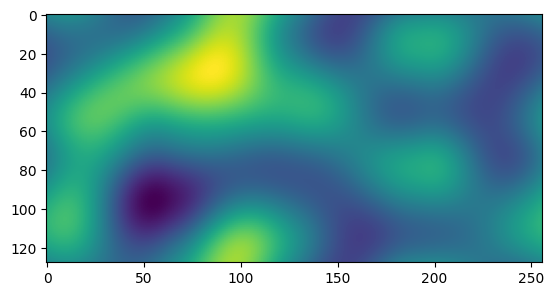

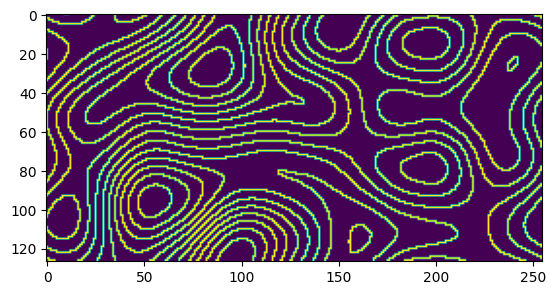

In [14]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
from perlin_numpy import generate_perlin_noise_2d

noise = generate_perlin_noise_2d(shape=[2**7, 2**8], res=[2**1,2**2], tileable=[True,True])
noise = (noise + 1.0) / 2.0

def threshold(array, upper_limit=0.5, lower_limit=0.0):
    select = array < upper_limit 
    select_lower = array >= lower_limit
    array = array.copy()
    array *= 0
    array[np.logical_and(select, select_lower)] = 1.0
    return array

def categorize(window):
    a = window.flatten()
    return a.dot(1 << np.arange(a.shape[-1] - 1, -1, -1))

isoline_heights = 20 #includes start 0 and end 1
thresholds = np.linspace(0,1,isoline_heights)

plt.figure()
plt.imshow(noise)
                         
result = np.zeros(((noise.shape[0]-1), (noise.shape[1]-1)))
for t in thresholds[1:-1]:
    windows = sliding_window_view(threshold(noise, t), window_shape=(2,2))
    contour_category = np.array(list(categorize(windows[row,col]) for row in range(windows.shape[0]) for col in range(windows.shape[1]))).reshape(windows.shape[:2])
    contour_pixels = threshold(contour_category, 15, 1)
    # plt.figure()
    # plt.imshow(contour_pixels)
    result = np.logical_or(result, contour_pixels)

plt.figure()
plt.imshow(result)

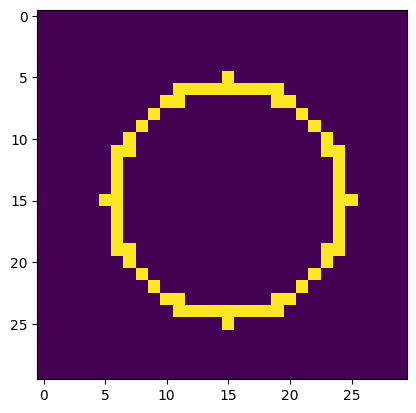

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
base = np.zeros((30,30))
n_points = 100
radius = 10
points = []
for i in range(n_points):
    theta = i*360./float(n_points)
    x = (radius) * math.cos(math.radians(theta))
    y = (radius) * math.sin(math.radians(theta))
    points.append((int(x),int(y)))
for x,y in points:
    base[15+x][15+y] = 1.0
plt.imshow(base)

In [9]:
from PIL import Image

im = Image.open("person.png")
print(im.size)
# im

(3072, 4080)


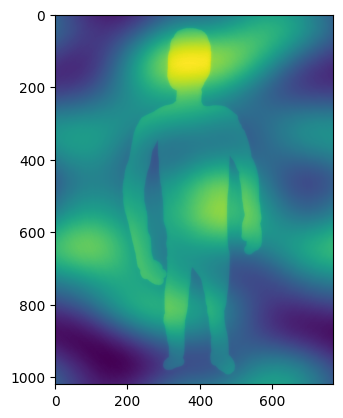

In [94]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
from perlin_numpy import generate_perlin_noise_2d
from PIL import Image, ImageFilter, ImageOps

im = Image.open("person.png").convert('L')
im = im.resize((np.array(im.size)/4).astype(np.int64))
im = ImageOps.invert(im)
im.size[::-1]
noise = generate_perlin_noise_2d(shape=im.size[::-1], res=[2**2,2**1], tileable=[True,True])
noise = (noise + 1.0) / 4.0

for r in [300,200,100,5]:
    blurred = im.filter(ImageFilter.GaussianBlur(radius=r))
    im = Image.blend(im, blurred, alpha=0.5)

noise += np.array(im, dtype=np.float64)/(2.*255.)
noise = np.clip(noise, 0.0, 1.0)
plt.figure()
plt.imshow(noise)

In [99]:
with open("result", "wb") as f:
    np.save(f, noise)

In [103]:
noise /= noise.max()

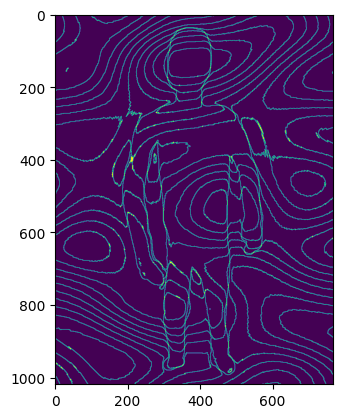

In [104]:

def threshold(array, upper_limit=0.5, lower_limit=0.0):
    select = array < upper_limit 
    select_lower = array >= lower_limit
    array = array.copy()
    array *= 0
    array[np.logical_and(select, select_lower)] = 1.0
    return array

def categorize(window):
    a = window.flatten()
    return a.dot(1 << np.arange(a.shape[-1] - 1, -1, -1))

isoline_heights = 20 #includes start 0 and end 1
thresholds = np.linspace(0,1,isoline_heights)
                         
result = np.zeros(((noise.shape[0]-1), (noise.shape[1]-1)))
for t in thresholds[1:-1]:
    windows = sliding_window_view(threshold(noise, t), window_shape=(2,2))
    contour_category = np.array(list(categorize(windows[row,col]) for row in range(windows.shape[0]) for col in range(windows.shape[1]))).reshape(windows.shape[:2])
    contour_pixels = threshold(contour_category, 15, 1)
    result = np.logical_or(result, contour_pixels)
    

plt.figure()
plt.imshow(result)